### Week 3- Summarising data
- Using '10,000 Data about movies (1915 - 2023)' dataset found on kaggle (https://www.kaggle.com/datasets/willianoliveiragibin/10000-data-about-movies-1915-2023)
- Code adadpted from https://git.arts.ac.uk/lmccallum/Intro-to-ds-23-24/blob/master/intro-to-ds-week-3.ipynb

In [26]:
!pip install Counter

  Using cached Counter-1.0.0.tar.gz (5.2 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for Counter: filename=Counter-1.0.0-py3-none-any.whl size=5394 sha256=e41cc33047449d7108d9f47a624be5ee0d0ac03b7797c244197490a00ba31bab
  Stored in directory: /Users/nixi/Library/Caches/pip/wheels/8c/53/bd/a2a81742d0585769e6f7304ccafdd9d85b828371602b103728
Successfully built Counter


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/movie-data.csv').set_index("Movie Name")
df

,Unnamed: 0,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
Movie Name,,,,,,,,,,,,
The Shawshank Redemption,0,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
The Godfather,1,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
Ramayana: The Legend of Prince Rama,2,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
The Chaos Class,3,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
The Dark Knight,4,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."
...,...,...,...,...,...,...,...,...,...,...,...,...
Golmaal Again,9995,2017,140,4.9,10183,NaN,1010000.0,"['Action', ' Comedy', ' Fantasy']",Not Rated,['Rohit Shetty'],"['Ajay Devgn', 'Arshad Warsi', 'Tabu', 'Shreya...","['The', 'gang', 'encounters', 'with', 'some', ..."
Not to Forget,9996,2021,84,4.9,11191,NaN,NaN,['Drama'],NaN,['Valerio Zanoli'],"['Karen Grassle', 'Louis Gossett Jr.', ""Tatum ...","['After', 'a', 'lifetime', 'of', 'scams,', 'a'..."
Housefull 3,9997,2016,140,4.9,10308,NaN,1160000.0,"['Action', ' Comedy', ' Romance']",Not Rated,"['Sajid', 'Farhad Samji']","['Akshay Kumar', 'Abhishek Bachchan', 'Riteish...","['A', 'father', ""doesn't"", 'want', 'his', 'thr..."


In [4]:
# what are the different genres available in the file?
df['Genre'].unique() 

array(["['Drama']", "['Crime', ' Drama']",
       "['Animation', ' Action', ' Adventure']", "['Comedy', ' Drama']",
       "['Action', ' Crime', ' Drama']",
       "['Biography', ' Drama', ' History']",
       "['Action', ' Adventure', ' Drama']",
       "['Crime', ' Mystery', ' Thriller']", "['Adventure', ' Drama']",
       "['Animation', ' Action', ' Fantasy']",
       "['Action', ' Adventure', ' Biography']", "['Comedy']",
       "['Action', ' Adventure', ' Sci-Fi']", "['Drama', ' Romance']",
       "['Adventure', ' Western']", "['Crime', ' Drama', ' Mystery']",
       "['Action', ' Crime', ' Thriller']",
       "['Adventure', ' Comedy', ' Drama']",
       "['Comedy', ' Horror', ' Mystery']",
       "['Comedy', ' Family', ' Mystery']",
       "['Adventure', ' Drama', ' Sci-Fi']",
       "['Biography', ' Crime', ' Drama']", "['Action', ' Sci-Fi']",
       "['Action', ' Adventure', ' Fantasy']",
       "['Biography', ' Drama', ' Music']", "['Biography', ' Drama']",
       "['Action', 

In [5]:
# How many different genres are there?
len(df['Genre'].unique() )

425

There are 425 variations of arrays within the genre column.

In [6]:
# How many of each unique genre are there in the dataset?
df['Genre'].value_counts()

Genre
['Comedy', ' Drama', ' Romance']    481
['Drama']                           429
['Comedy', ' Drama']                406
['Drama', ' Romance']               347
['Action', ' Crime', ' Drama']      324
                                   ... 
['Thriller', ' War']                  1
['Romance', ' Thriller', ' War']      1
['Adventure', ' Family']              1
['Drama', ' Horror', ' Western']      1
['Mystery', ' Sci-Fi']                1
Name: count, Length: 425, dtype: int64

 Each film has other classifying categories, not just a singular, which would create problems when plotting for movie rating and genre. 

In [7]:
# Create a new column 'First Genre' containing the first value from the 'Genre' column
df['First Genre'] = df['Genre'].str.split(',').str[0].str.strip()

In [8]:
# What does the dataframe look like?
df

,Unnamed: 0,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description,First Genre
Movie Name,,,,,,,,,,,,,
The Shawshank Redemption,0,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye...",['Drama']
The Godfather,1,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'...",['Crime'
Ramayana: The Legend of Prince Rama,2,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi...",['Animation'
The Chaos Class,3,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '...",['Comedy'
The Dark Knight,4,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'...",['Action'
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Golmaal Again,9995,2017,140,4.9,10183,NaN,1010000.0,"['Action', ' Comedy', ' Fantasy']",Not Rated,['Rohit Shetty'],"['Ajay Devgn', 'Arshad Warsi', 'Tabu', 'Shreya...","['The', 'gang', 'encounters', 'with', 'some', ...",['Action'
Not to Forget,9996,2021,84,4.9,11191,NaN,NaN,['Drama'],NaN,['Valerio Zanoli'],"['Karen Grassle', 'Louis Gossett Jr.', ""Tatum ...","['After', 'a', 'lifetime', 'of', 'scams,', 'a'...",['Drama']
Housefull 3,9997,2016,140,4.9,10308,NaN,1160000.0,"['Action', ' Comedy', ' Romance']",Not Rated,"['Sajid', 'Farhad Samji']","['Akshay Kumar', 'Abhishek Bachchan', 'Riteish...","['A', 'father', ""doesn't"", 'want', 'his', 'thr...",['Action'


In [9]:
# Clean unwanted symbols and white spaces from the new column
df['First Genre'] = df['First Genre'].fillna('').astype(str).str.replace('[\[\]\'\s]', '', regex=True)

In [10]:
# Has this process of data cleaning been successful?
df

,Unnamed: 0,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description,First Genre
Movie Name,,,,,,,,,,,,,
The Shawshank Redemption,0,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye...",Drama
The Godfather,1,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'...",Crime
Ramayana: The Legend of Prince Rama,2,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi...",Animation
The Chaos Class,3,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '...",Comedy
The Dark Knight,4,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'...",Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Golmaal Again,9995,2017,140,4.9,10183,NaN,1010000.0,"['Action', ' Comedy', ' Fantasy']",Not Rated,['Rohit Shetty'],"['Ajay Devgn', 'Arshad Warsi', 'Tabu', 'Shreya...","['The', 'gang', 'encounters', 'with', 'some', ...",Action
Not to Forget,9996,2021,84,4.9,11191,NaN,NaN,['Drama'],NaN,['Valerio Zanoli'],"['Karen Grassle', 'Louis Gossett Jr.', ""Tatum ...","['After', 'a', 'lifetime', 'of', 'scams,', 'a'...",Drama
Housefull 3,9997,2016,140,4.9,10308,NaN,1160000.0,"['Action', ' Comedy', ' Romance']",Not Rated,"['Sajid', 'Farhad Samji']","['Akshay Kumar', 'Abhishek Bachchan', 'Riteish...","['A', 'father', ""doesn't"", 'want', 'his', 'thr...",Action


In [11]:
# Reduce the df to main columns for insights and ensure NaN values are removed ( helps when plotting with matplot.lib)
df = df[['Year of Release','Run Time in minutes','Movie Rating','Votes','First Genre']].dropna()
df

,Year of Release,Run Time in minutes,Movie Rating,Votes,First Genre
Movie Name,,,,,
The Shawshank Redemption,1994,142,9.3,2804443,Drama
The Godfather,1972,175,9.2,1954174,Crime
Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,Animation
The Chaos Class,1975,87,9.2,42231,Comedy
The Dark Knight,2008,152,9.0,2786129,Action
...,...,...,...,...,...
Golmaal Again,2017,140,4.9,10183,Action
Not to Forget,2021,84,4.9,11191,Drama
Housefull 3,2016,140,4.9,10308,Action


In [12]:
# Ensured NaN values were not present in the chosen columns
df = df.dropna()
df

,Year of Release,Run Time in minutes,Movie Rating,Votes,First Genre
Movie Name,,,,,
The Shawshank Redemption,1994,142,9.3,2804443,Drama
The Godfather,1972,175,9.2,1954174,Crime
Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,Animation
The Chaos Class,1975,87,9.2,42231,Comedy
The Dark Knight,2008,152,9.0,2786129,Action
...,...,...,...,...,...
Golmaal Again,2017,140,4.9,10183,Action
Not to Forget,2021,84,4.9,11191,Drama
Housefull 3,2016,140,4.9,10308,Action


# Movie rating overall

In [13]:
# Round each rating to the nearest integer using np.floor()
df['movie_rating'] = np.floor(df['Movie Rating'].values).astype(int)

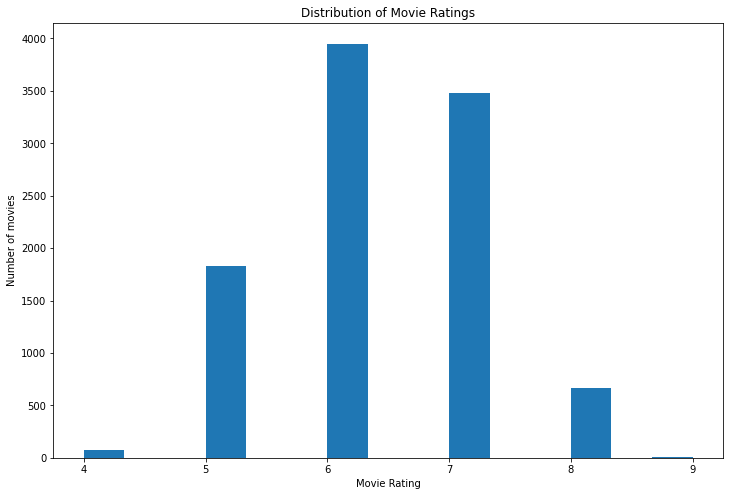

In [14]:
# How does the rating vary across the whole dataset?
fig, ax = plt.subplots(figsize=(12, 8))
number_of_bins = 15
h = ax.hist(df['movie_rating'], bins=number_of_bins) 
ax.set_ylabel("Number of movies")
ax.set_xlabel("Movie Rating")
ax.set_title("Distribution of Movie Ratings")
plt.show()

# Movie rating by genre
I set out to create a side-by-side histogram for the movie ratings by genre data which allows for a clearer comparison of movie ratings across different genres. 
Each genre is represented by a different color, and the side-by-side layout helps to avoid overlapping the genres in the visualization.
While the data shows higher ratings for Comedy, Action, Drama, Crime, Biography


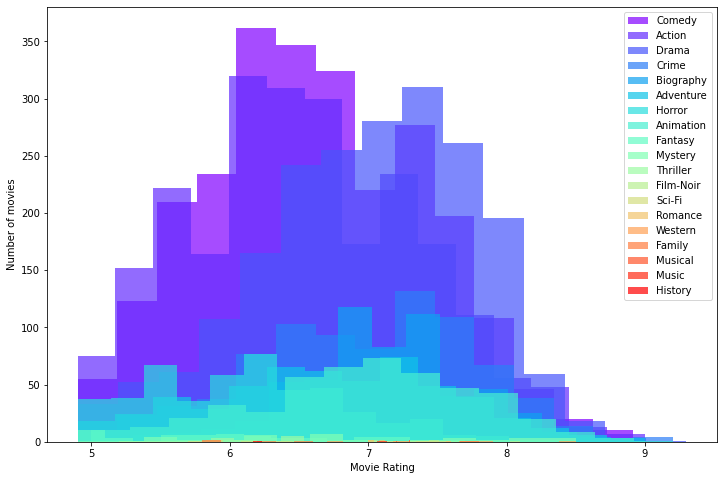

In [15]:
# Get the first of each unique genres and their counts
unique_genres_counts = df['First Genre'].value_counts()

# Plot results for each genre with rainbow colors
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_genres_counts)))

for i, (genre, count) in enumerate(unique_genres_counts.items()):
    # Filter DataFrame for movies belonging to the current genre
    genre_df = df[df['First Genre'] == genre]
    
    # Plot histogram for movie ratings of the current genre with a different color
    ax.hist(genre_df['Movie Rating'], bins=number_of_bins, label=genre, alpha=0.7, color=colors[i])

ax.set_ylabel("Number of movies")
ax.set_xlabel("Movie Rating")
ax.legend()
plt.show()

The differentiation between each of the genres was difficult to work out using 'plt.cm.rainbow', instead, i opted for a categorical colour palette (Seaborn)which assigns distinct colors to each genre.
Additionally, I wanted to combine the data from multiple histograms for each genre into a single visualization , which could provide a clearer and more concise representation of the movie ratings by genre. 
I opted for a violin plot instead of a histogram.

<ipython-input-16-6180917c56da>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='First Genre', y='movie_rating', data=df, palette='husl') # https://seaborn.pydata.org/generated/seaborn.violinplot.html


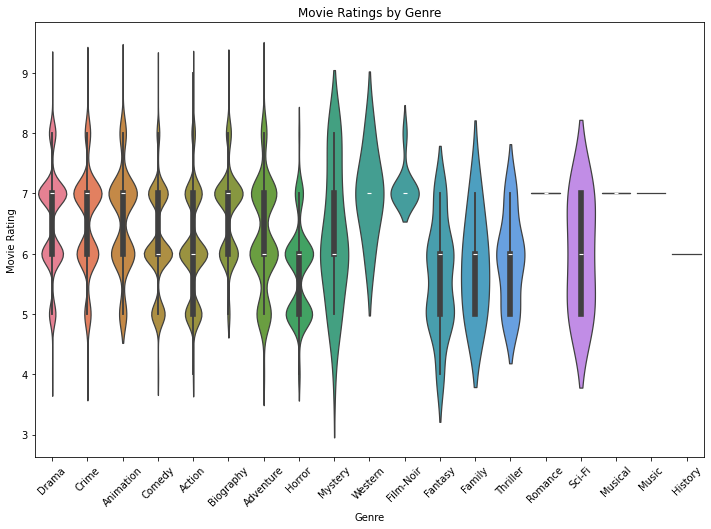

In [16]:
import seaborn as sns

# Create a violin plot for movie ratings by genre
plt.figure(figsize=(12, 8))
sns.violinplot(x='First Genre', y='movie_rating', data=df, palette='husl') # https://seaborn.pydata.org/generated/seaborn.violinplot.html
plt.xlabel('Genre')
plt.ylabel('Movie Rating')
plt.title('Movie Ratings by Genre')
plt.xticks(rotation=45)
plt.show()

- Why is data missing for 'Musical', 'Music' and 'History'?
- np.where and np.sum to find where the data is and gow many points there are within each category

In [17]:
musical_data = np.where(df['First Genre'] == 'Musical', 1, 0)
music_data = np.where(df['First Genre'] == 'Music', 1, 0)
history_data = np.where(df['First Genre'] == 'History', 1, 0)

# Sum the occurrences of each category
musical_count = np.sum(musical_data) # https://www.geeksforgeeks.org/numpy-sum-in-python/
music_count = np.sum(music_data)
history_count = np.sum(history_data)

print('Musical count:', musical_count)
print('Music count:', music_count)
print('History count:', history_count)

Musical count: 3
Music count: 1
History count: 1


# Central tendancy 
- Continuation from week 3 class tasks
- Work out the mean, median and mode for each genre category
- Work out the mean, median and mode for all movie rating data

In [18]:
mean_ratings = df.groupby('First Genre')['Movie Rating'].mean()
mean_ratings

First Genre
Action       6.533135
Adventure    6.732044
Animation    6.969583
Biography    7.108859
Comedy       6.611010
Crime        6.966341
Drama        6.990113
Family       6.420000
Fantasy      6.076271
Film-Noir    7.450000
History      6.200000
Horror       6.121784
Music        7.100000
Musical      7.266667
Mystery      6.760000
Romance      7.160000
Sci-Fi       6.537500
Thriller     6.310526
Western      7.580000
Name: Movie Rating, dtype: float64

In [19]:
median_ratings = df.groupby('First Genre')['Movie Rating'].median()
median_ratings

First Genre
Action       6.50
Adventure    6.80
Animation    7.00
Biography    7.10
Comedy       6.60
Crime        7.10
Drama        7.10
Family       6.20
Fantasy      6.00
Film-Noir    7.45
History      6.20
Horror       6.10
Music        7.10
Musical      7.30
Mystery      6.70
Romance      7.10
Sci-Fi       6.30
Thriller     6.20
Western      7.70
Name: Movie Rating, dtype: float64

In [20]:
mode_ratings = df.groupby('First Genre')['Movie Rating'].apply(lambda x: x.mode().iloc[0])
mode_ratings

First Genre
Action       6.1
Adventure    6.9
Animation    7.2
Biography    7.3
Comedy       6.3
Crime        7.3
Drama        7.4
Family       5.8
Fantasy      4.9
Film-Noir    7.0
History      6.2
Horror       6.0
Music        7.1
Musical      7.3
Mystery      6.1
Romance      7.0
Sci-Fi       5.9
Thriller     6.5
Western      6.7
Name: Movie Rating, dtype: float64

In [32]:
from collections import Counter
# Calculate mean, median and mode for all data as one
mean_rating = np.mean(df['Movie Rating'])
median_rating = np.median(df['Movie Rating'])
mode_rating = Counter(df['Movie Rating']).most_common(1)[0][0]

print("Mean Rating:", mean_rating)
print("Median Rating:", median_rating)
print("Mode Rating:", mode_rating)

Mean Rating: 6.7270199999999996
Median Rating: 6.7
Mode Rating: 6.7


In [ ]:
# Aggregate data from items in same categories
grouped = df.groupby('First Genre')

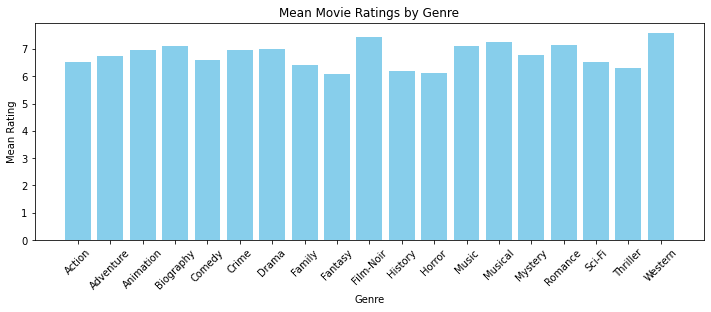

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(mean_ratings.index, mean_ratings, color='skyblue')
ax.set_ylabel("Mean Rating")
ax.set_xlabel("Genre")
ax.set_title("Mean Movie Ratings by Genre")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The graph shows that...
- Western and Film-Noir had the highest movie ratings than the rest. 
- Fantasy, Horror and History scored the lowest mean rating at around 6 out of 10.


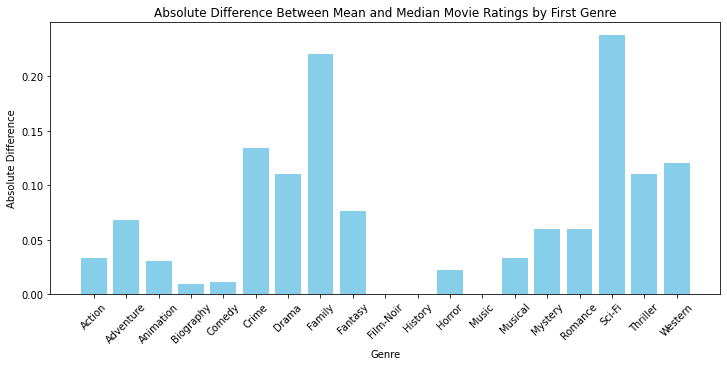

In [33]:
# Task 1; work out the absolute difference between the mean and median movie rating for each genre as a bar chart.

# calculate the absolute difference
abs_diff = np.abs(mean_ratings - median_ratings)

# Create a bar chart to visualize the absolute differences
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(abs_diff.index, abs_diff, color='skyblue')
ax.set_ylabel("Absolute Difference")
ax.set_xlabel("Genre")
ax.set_title("Absolute Difference Between Mean and Median Movie Ratings by First Genre")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Standard deviation

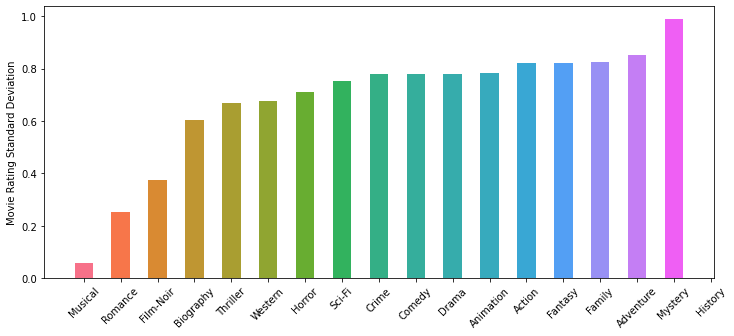

In [ ]:
# Get standard deviation from grouped items
std_ratings = df.groupby('First Genre')['Movie Rating'].std().sort_values()

# Define a color palette for the bar plot
colors = sns.color_palette("husl", len(std_ratings))

# Plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_ylabel("Movie Rating Standard Deviation")
ax.bar(std_ratings.index, std_ratings, 0.5, color=colors)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The standard deviation shows the amount of variation within each category. In this case, 'Mystery' genre had the highest data variation, while 'Musical' had the lowest. It is also important to note that these values were previously rounded to the nearest integer using np.floor(), so the confidence percentasge that the data is completely true may be reduced.

# Z scores for movie ratings
- Calculation of how many standard deviations a measurement is from the mean 

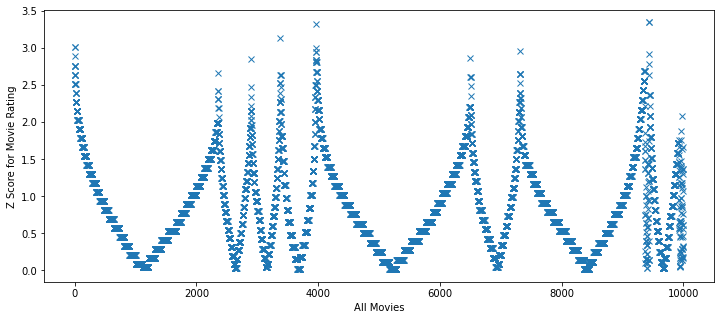

In [ ]:
z_scores = []
for genre in mean_ratings.index:
    mean = mean_ratings.loc[genre]
    std = std_ratings.loc[genre]
    group = df[df['First Genre'] == genre]
    dist = np.abs(group['Movie Rating'] - mean) / std
    z_scores.extend(dist)

# Plot the z-scores
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_ylabel("Z Score for Movie Rating")
ax.set_xlabel("All Movies")
ax.plot(z_scores, "x")
plt.show()

In [ ]:
z_scores = []
for genre in mean_ratings.index:
    mean = mean_ratings.loc[genre]
    std = std_ratings.loc[genre]
    group = df[df['First Genre'] == genre]
    dist = np.abs(group['Movie Rating'] - mean) / std
    z_scores.extend(dist)

df['zscore'] = z_scores

# Standard error
The above graph shows a pattern in the data which does not seem quite right. 

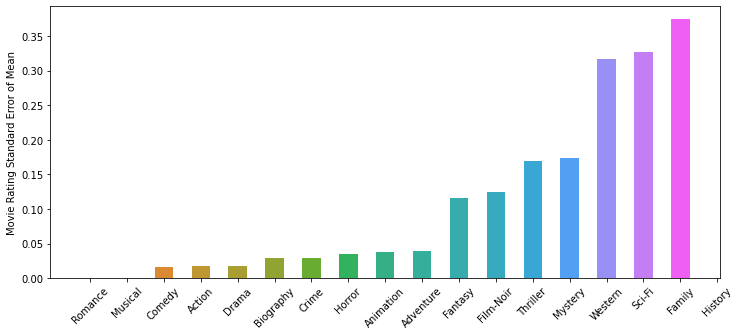

In [34]:
# Calculate the standard error of the mean for movie ratings
sem_ratings = df.groupby('First Genre')['movie_rating'].sem().sort_values()

# Create a color palette for the bar plot
colors = sns.color_palette("husl", len(sem_ratings))

# Plot the standard error of the mean for each genre
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_ylabel("Movie Rating Standard Error of Mean")
ax.bar(sem_ratings.index, sem_ratings, 0.5, color=colors)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Task 2; print out the movie names whose movie ratings are more than 3 standard deviations ( z score higher than 3) from the mean
    # Filter the DataFrame based on z-scores higher than 3
for i,zscore in enumerate(df["zscore"]):
    if zscore > 3:
        print(df.iloc[i].name)


The Shawshank Redemption
The Godfather
Love, Rosie
Son of Rambow
Dhoom 3
Prom


# Confidence intervals

In [ ]:
confidence_intervals = []
num_samples = 100
z = 1.96  # Z-score for 95% confidence interval

for genre in mean_ratings.index:
    # Get mean for genre
    mean = mean_ratings.loc[genre]
    
    # Get standard deviation for genre
    std = std_ratings.loc[genre]
    
    # Calculate confidence range
    dist = z * (std / np.sqrt(num_samples))
    
    print(genre, np.round(mean, 1), "+-", np.round(dist, 3))
    confidence_intervals.append([dist, dist])

Action 6.5 +- 0.161
Adventure 6.7 +- 0.167
Animation 7.0 +- 0.153
Biography 7.1 +- 0.118
Comedy 6.6 +- 0.153
Crime 7.0 +- 0.153
Drama 7.0 +- 0.153
Family 6.4 +- 0.162
Fantasy 6.1 +- 0.161
Film-Noir 7.4 +- 0.073
History 6.2 +- nan
Horror 6.1 +- 0.139
Music 7.1 +- nan
Musical 7.3 +- 0.011
Mystery 6.8 +- 0.194
Romance 7.2 +- 0.049
Sci-Fi 6.5 +- 0.147
Thriller 6.3 +- 0.131
Western 7.6 +- 0.132


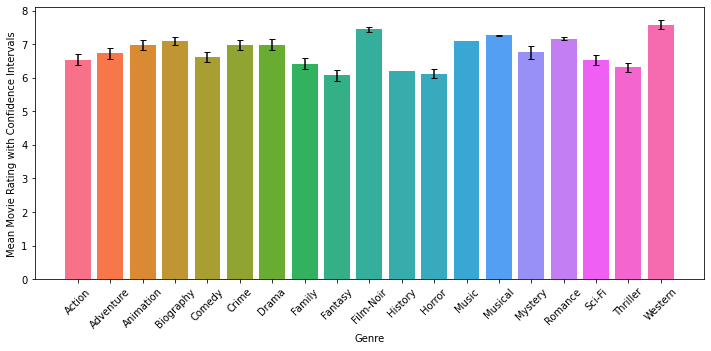

In [ ]:
# Plot confidence intervals on the mean movie rating
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(mean_ratings.index, mean_ratings, color=colors) # all defined above
ax.errorbar(mean_ratings.index, mean_ratings, yerr=np.array(confidence_intervals).T, fmt='none', ecolor='black', capsize=3) #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html
ax.set_ylabel("Mean Movie Rating with Confidence Intervals")
ax.set_xlabel("Genre")
plt.xticks(rotation=45) # rotate the labels for better visualisation
plt.show()


Task 4: 
- Raising the 'num_samples' value tightens the confidence interval by improving estimate accuracy. Lowering it has the opposite effect, broadening the interval.


Task 5: Why does 'Musicals' have the smallest confidence level?
- The confidence level for ‘Musicals’ is extremely narrow  ( Musical 7.3 +- 0.011) which suggests very precise data.

Task 6: Explore some of the other measurements there are for each movie.

- How does the number of votes impact the movie rating data so far?

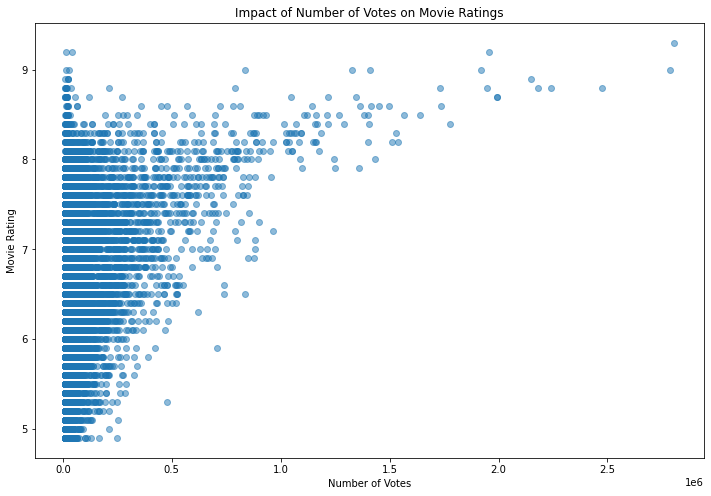

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Votes'], df['Movie Rating'], alpha=0.5)
plt.xlabel('Number of Votes')
plt.ylabel('Movie Rating')
plt.title('Impact of Number of Votes on Movie Ratings')
plt.show()

In [ ]:
# code adapted from: https://datagy.io/python-correlation-matrix/ 
# correlation coefficient between 'Votes' and 'Movie Rating' to quantify the relationship:
correlation = df['Votes'].corr(df['Movie Rating']) 
print("Correlation between Number of Votes and Movie Rating:", correlation)

Correlation between Number of Votes and Movie Rating: 0.3091738597007562


In [ ]:
# Calculate summary statistics for each variable by genre
# Code adapted from: https://stackoverflow.com/questions/24203136/pandas-dataframe-groupby-displaying-group-statistics
summary_stats = df.groupby('First Genre').agg({'Votes': ['mean', 'median', 'std'],
                                               'Movie Rating': ['mean', 'median', 'std'],
                                               'Year of Release': ['min', 'max']})

print(summary_stats)


                     Votes                         Movie Rating         \
                      mean   median            std         mean median   
First Genre                                                              
Action       135930.079762  53778.0  220032.653524     6.533135   6.50   
Adventure    109295.898711  41288.0  189263.892719     6.732044   6.80   
Animation    122868.912500  50786.5  179123.958142     6.969583   7.00   
Biography     91099.959114  36297.0  165860.966220     7.108859   7.10   
Comedy        62654.318863  27586.0   94961.634303     6.611010   6.60   
Crime         93162.392683  29851.5  207679.414920     6.966341   7.10   
Drama         74091.823789  26891.0  161577.092483     6.990113   7.10   
Family        57251.400000  19762.0   87977.215049     6.420000   6.20   
Fantasy       55229.254237  26380.0   74491.694485     6.076271   6.00   
Film-Noir     50641.625000  31163.0   55189.510812     7.450000   7.45   
History       12106.000000  12106.0   

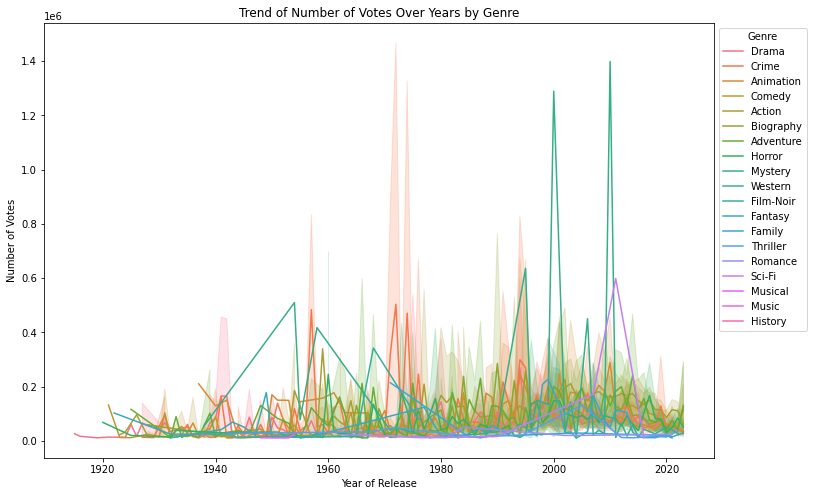

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.lineplot(x='Year of Release', y='Votes', hue='First Genre', data=df, palette='husl')
plt.xlabel('Year of Release')
plt.ylabel('Number of Votes')
plt.title('Trend of Number of Votes Over Years by Genre')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.show()

### Bibliography
- https://datagy.io/python-correlation-matrix/
- https://www.geeksforgeeks.org/numpy-sum-in-python/
- https://seaborn.pydata.org/generated/seaborn.violinplot.html
- https://git.arts.ac.uk/lmccallum/Intro-to-ds-23-24/blob/master/intro-to-ds-week-3.ipynb 
- https://www.kaggle.com/datasets/willianoliveiragibin/10000-data-about-movies-1915-2023 
- https://stackoverflow.com/questions/24203136/pandas-dataframe-groupby-displaying-group-statistics